<a href="https://colab.research.google.com/github/UFM-Market-Trends/UFM-Market-Trends-SDK/blob/main/examples/4_Sector_Externo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pyxlsb
!pip install fpdf
import datetime
!pip install git+https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git
import ufmtrends_sdk as trends
today = datetime.date.today().strftime("%Y-%m-%d")
!pip install --upgrade xlrd

  Using cached pyxlsb-1.0.10-py2.py3-none-any.whl (23 kB)
  Using cached fpdf-1.7.2-py2.py3-none-any.whl
  Cloning https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to /tmp/pip-req-build-21j3r7ko
  Running command git clone --filter=blob:none --quiet https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git /tmp/pip-req-build-21j3r7ko
  Resolved https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to commit 9064e503fcb23b4a44b532364ce5844c318ab5f7
  Preparing metadata (setup.py) ... done
  Created wheel for ufmtrends-sdk: filename=ufmtrends_sdk-0.1.7-py3-none-any.whl size=13195 sha256=fa930e8053f0076e97b6de7e977d84c57d9c90e7ea3bcdaf0adbd97782a1ffe5
  Stored in directory: /tmp/pip-ephem-wheel-cache-jyy08mzn/wheels/d8/63/72/fd94fcb7285b31cd0125721e8d1340b8842b4efc3b6d212027
Successfully built ufmtrends-sdk
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [2]:
# # https://colab.research.google.com/notebooks/snippets/gcs.ipynb
# from google.colab import auth
# auth.authenticate_user()

# project_id = 'ufm-market-trends'
# !gcloud config set project {project_id}

# Sector Externo

In [4]:
# https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
# Recurso opcional de referencia
# https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
# https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row


def download_balance_payments(balance_payments_url=None):
  if balance_payments_url==None:
    balance_payments_url="https://www.banguat.gob.gt/sites/default/files/banguat/Publica/vi_man_bpagos/vi_balanza_pagos_trimestral_ver_banguat.xls"


  balance_payements_dataframe = pd.read_excel(balance_payments_url, 
                                              sheet_name=0,
                                              skiprows=6,
                                              skipfooter=4)
  balance_payements_dataframe
  balance_payements_dataframe.drop(balance_payements_dataframe.iloc[:,0:1], 
                                  axis=1, 
                                  inplace=True)
  balance_payements_dataframe = balance_payements_dataframe.T
  balance_payements_dataframe.reset_index(inplace=True)

  new_header = balance_payements_dataframe.iloc[0]
  balance_payements_dataframe = balance_payements_dataframe[1:] 
  balance_payements_dataframe.columns = new_header
  balance_payements_dataframe.rename(columns={'Descripción': 'date'},
                                    inplace=True)

  balance_payements_dataframe.reset_index(inplace=True,drop=True)

  year_rows = np.arange(start=4,
                        stop=len(balance_payements_dataframe["date"]),
                        step=5)
  # Última fila también tendrá un acumulado de lo que va del año.
  latest_year_row = len(balance_payements_dataframe["date"]) -1

  balance_payements_dataframe.drop(list(year_rows) + [latest_year_row], 
                                  inplace=True)

  balance_payements_dataframe.reset_index(inplace=True,drop=True)

  def get_quarter_series(start_year, quarters_amount):
    start_date = datetime.datetime(year=start_year, 
                                  month=1, 
                                  day=1)

    quarters = pd.period_range(start_date, periods=quarters_amount, freq='Q')
    return quarters

  quarters = get_quarter_series(2008, len(balance_payements_dataframe['date']))

  balance_payements_dataframe["date"] = pd.PeriodIndex(quarters, freq='Q').to_timestamp()

  balance_payements_dataframe.insert(loc=1, column="quarter", value=quarters, allow_duplicates=True) 

  return balance_payements_dataframe


# (Parámetro predeterminado)
# balance_payments_url =  "https://www.banguat.gob.gt/sites/default/files/banguat/Publica/vi_man_bpagos/vi_balanza_pagos_trimestral_ver_banguat.xls"
balance_payements_dataframe = download_balance_payments()

balance_payements_dataframe.iloc[-5:]

,date,quarter,A. CUENTA CORRIENTE,A.1. BIENES,A.1.1. Exportaciones FOB (Créditos),A.1.2. Importaciones FOB (Débitos),A.2. SERVICIOS,A.2.1. Servicios de manufactura sobre insumos físicos pertenecientes a otros,Crédito,Débito,...,D.2.4. Otra inversión,Otras participaciones de capital,Moneda y depósitos,Préstamos,"Seguros, pensiones y mecanismos normalizados de garantía.",Créditos y anticipos comerciales,Otras cuentas por pagar,Asignaciones de DEGS,E. ERRORES Y OMISIONES (NETO),F. ACTIVOS DE RESERVA
55,2021-10-01,2021Q4,-210.18697,-3372.18668,3226.24164,6598.42832,-505.84744,104.62368,104.62368,0.0,...,227.95527,0.0,-304.60882,517.14384,-3.31981,34.50138,-15.76132,0.0,-34.00806,1225.82017
56,2022-01-01,2022Q1,215.05111,-3085.59619,3703.21766,6788.81385,-459.70018,146.74846,146.74846,0.0,...,-697.76577,0.0,-63.12467,-774.10563,-0.21994,123.6007,16.08377,0.0,149.35083,231.81342
57,2022-04-01,2022Q2,526.42129,-3568.12264,3780.08142,7348.20406,-370.27173,156.68329,156.68329,0.0,...,-710.42711,0.0,-153.41952,-337.63631,-0.21806,-186.52094,-32.63228,0.0,-152.61812,-629.00603
58,2022-07-01,2022Q3,119.71236,-3959.21554,3474.80512,7434.02066,-367.4867,151.68388,151.68388,0.0,...,32.33768,0.0,-142.31342,275.10928,0.84591,-87.63341,-13.67068,0.0,-156.95054,958.43204
59,2022-10-01,2022Q4,458.24225,-3573.09836,3323.56216,6896.66052,-405.74897,134.45452,134.45452,0.0,...,-894.71946,0.0,-76.37426,-699.78596,0.24246,-116.79182,-2.00988,0.0,-295.76702,-528.21372


In [6]:
balance_payements_dataframe = balance_payements_dataframe.iloc[:, 
                                                               [0,1,
                                                                # Cuenta corriente
                                                                2,4,5,3,6,
                                                                10,13,25,29,30,
                                                                44,45,
                                                                # Cuenta financiera
                                                                51, 52, 53,
                                                                54, 60, 61, 63,
                                                                65, 66, 67, 68, 69,
                                                                70, 76, 77, 79]]

# Cuenta corriente
CURRENT_ACCOUNT = "Balanza por cuenta corriente"
EXPORTS = "Exportaciones"
IMPORTS = "Importaciones"
BALANCE_OF_GOODS = "Balanza de bienes"
BALANCE_OF_SERVICES = "Balanza de servicios"
TRANSPORT = "Transporte"
TRAVEL = "Viajes"
PRIMARY_INCOME = "Ingreso primario"
DIRECT_INVESTMENT_INCOME = "Renta inversión directa"
DIRECT_INVESTMENT_CREDIT_INCOME = "Renta inversión directa (crédito)"
SECONDARY_INCOME = "Ingreso secundario"
NET_REMITTANCES = "Remesas netas"

# Cuenta financiera
FINANCIAL_ACCOUNT = "Cuenta financiera"
NET_FINANCIAL_ASSETS = "Adquisición neta activos financieros"
DIRECT_INVESTMENT_ABROAD = "Inversión directa en el exterior"
PORTFOLIO_INVESTMENT = "Inversión de cartera"
CURRENCY_DEPOSITS_ASSETS = "Moneda y depósitos (proxy salida de capitales (activos))"
LOAN_ASSETS = "Préstamos (activos)"
TRADE_CREDIT_ASSETS = "Créditos y anticipos comerciales (activos)"
LIABILITIES = "Pasivos incurridos"
FOREIGN_DIRECT_INVESTMENT = "Inversión directa en Guatemala"
FDI_SHARES = "IED-Acciones y otras participaciones" 
FDI_PROFITS_REINVESTMENT = "IED-Reinversión de utilidades"
FDI_DEBT_INSTRUMENTS = "IED-Instrumentos de deuda"
PORTFOLIO_INVESTMENT = "Inveresión en cartera"
CURRENCY_DEPOSITS_LIABILITIES = "Moneda y depósitos (proxy salida de capitales (pasivos))"
LOAN_LIABILITIES = "Préstamos recibidos (pasivos)"
TRADE_CREDIT_LIABILITIES = "Créditos y anticipos comerciales (pasivos)"

balance_payements_dataframe.columns = ['date', 'quarter', 
                                       # Cuenta corriente
                                       CURRENT_ACCOUNT, 
                                       EXPORTS, IMPORTS, BALANCE_OF_GOODS,
                                       BALANCE_OF_SERVICES, TRANSPORT, TRAVEL, 
                                       PRIMARY_INCOME, DIRECT_INVESTMENT_INCOME, 
                                       DIRECT_INVESTMENT_CREDIT_INCOME, 
                                       SECONDARY_INCOME, NET_REMITTANCES, 
                                       # Cuenta financiera
                                       FINANCIAL_ACCOUNT, 
                                       NET_FINANCIAL_ASSETS, 
                                       DIRECT_INVESTMENT_ABROAD, 
                                       PORTFOLIO_INVESTMENT, 
                                       CURRENCY_DEPOSITS_ASSETS, 
                                       LOAN_ASSETS,
                                       TRADE_CREDIT_ASSETS,
                                       LIABILITIES,
                                       FOREIGN_DIRECT_INVESTMENT, FDI_SHARES,
                                       FDI_PROFITS_REINVESTMENT,
                                        FDI_DEBT_INSTRUMENTS,
                                        PORTFOLIO_INVESTMENT,
                                        CURRENCY_DEPOSITS_LIABILITIES,
                                        LOAN_LIABILITIES,
                                        TRADE_CREDIT_LIABILITIES]


balance_payements_dataframe.iloc[-5:]

,date,quarter,Balanza por cuenta corriente,Exportaciones,Importaciones,Balanza de bienes,Balanza de servicios,Transporte,Viajes,Ingreso primario,...,Créditos y anticipos comerciales (activos),Pasivos incurridos,Inversión directa en Guatemala,IED-Acciones y otras participaciones,IED-Reinversión de utilidades,IED-Instrumentos de deuda,Inveresión en cartera,Moneda y depósitos (proxy salida de capitales (pasivos)),Préstamos recibidos (pasivos),Créditos y anticipos comerciales (pasivos)
55,2021-10-01,2021Q4,-210.18697,3226.24164,6598.42832,-3372.18668,-505.84744,-596.71342,36.91474,-868.87077,...,124.20299,3853.3016,2625.76777,2173.82675,445.99539,5.94563,999.57856,-304.60882,517.14384,34.50138
56,2022-01-01,2022Q1,215.05111,3703.21766,6788.81385,-3085.59619,-459.70018,-599.15314,10.95471,-365.31081,...,183.40188,479.06251,303.93721,1.25995,251.11009,51.56717,872.89107,-63.12467,-774.10563,123.6007
57,2022-04-01,2022Q2,526.42129,3780.08142,7348.20406,-3568.12264,-370.27173,-540.96172,-39.72546,-607.2486,...,130.70921,-1194.65656,331.80047,16.33989,234.24009,81.22049,-816.02992,-153.41952,-337.63631,-186.52094
58,2022-07-01,2022Q3,119.71236,3474.80512,7434.02066,-3959.21554,-367.4867,-557.13439,28.76226,-395.76539,...,140.76013,776.57733,357.31816,3.54669,341.50723,12.26424,386.92149,-142.31342,275.10928,-87.63341
59,2022-10-01,2022Q4,458.24225,3323.56216,6896.66052,-3573.09836,-405.74897,-492.78971,25.44701,-484.24412,...,-46.09477,-386.73667,359.35354,32.0121,306.40967,20.93177,148.62925,-76.37426,-699.78596,-116.79182


In [7]:
balance_payements_accumulated_df = balance_payements_dataframe.copy()
balance_payements_accumulated_df.iloc[:,2:] = balance_payements_accumulated_df.iloc[:,2:].transform(
    lambda x: trends.get_accumulated_values(x, lot_size=4) # 4 trimestres,
    )
balance_payements_accumulated_df.iloc[-5:]

,date,quarter,Balanza por cuenta corriente,Exportaciones,Importaciones,Balanza de bienes,Balanza de servicios,Transporte,Viajes,Ingreso primario,...,Créditos y anticipos comerciales (activos),Pasivos incurridos,Inversión directa en Guatemala,IED-Acciones y otras participaciones,IED-Reinversión de utilidades,IED-Instrumentos de deuda,Inveresión en cartera,Moneda y depósitos (proxy salida de capitales (pasivos)),Préstamos recibidos (pasivos),Créditos y anticipos comerciales (pasivos)
55,2021-10-01,2021Q4,1891.71765,12361.46101,23289.05441,-10927.59340,-1169.48435,-1831.93610,103.03137,-2126.07347,...,288.91679,4570.53010,3461.77430,2209.40230,1218.50322,33.86878,1757.34764,-349.69856,-987.91375,141.67160
56,2022-01-01,2022Q1,1340.54660,13070.27189,25071.08304,-12000.81115,-1451.20864,-2094.16561,98.48780,-2152.66764,...,351.47243,5352.05773,3505.98764,2169.16773,1250.30930,86.51061,2571.62674,-602.54637,-977.51960,286.54607
57,2022-04-01,2022Q2,1164.97821,13850.13707,26755.30341,-12905.16634,-1642.75887,-2232.96186,21.47146,-2262.02476,...,558.04626,3734.04793,3603.94113,2193.52646,1267.81565,142.59902,1056.13303,-762.32628,-742.66953,8.91709
58,2022-07-01,2022Q3,650.99779,14184.34584,28169.46689,-13985.12105,-1703.30605,-2293.96267,36.90625,-2237.19557,...,579.07421,3914.28488,3618.82361,2194.97328,1272.85280,150.99753,1443.36120,-663.46643,-319.48882,-116.05227
59,2022-10-01,2022Q4,1319.42701,14281.66636,28467.69909,-14186.03273,-1603.20758,-2190.03896,25.43852,-1852.56892,...,408.77645,-325.75339,1352.40938,53.15863,1133.26708,165.98367,592.41189,-435.23187,-1536.41862,-267.34547


In [8]:
balance_payments_accumulated_csv = "Balanza-Pagos-Millones-Dolares-Acum-4-Trimestres.csv"
balance_payements_accumulated_df.to_csv(balance_payments_accumulated_csv , index=False)

In [9]:
bucket_path = 'ufm-market-trends/guatemala/sector-externo/balanza-pagos/acum-4-trimestres'
csv_file = balance_payments_accumulated_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Balanza-Pagos-Millones-Dolares-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 23.8 KiB/ 23.8 KiB]                                                
Operation completed over 1 objects/23.8 KiB.                                     
Copying gs://ufm-market-trends/guatemala/sector-externo/balanza-pagos/acum-4-trimestres/Balanza-Pagos-Millones-Dolares-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 23.8 KiB/ 23.8 KiB]                                                
Operation completed over 1 objects/23.8 KiB.                                     
date,quarter,Balanza por cuenta corriente,Exportaciones,Importaciones,Balanza de bienes,Balanza de servicios,Transporte,Viajes,Ingreso primario,Renta inversión directa,Renta inversión directa (crédito),Ingreso secundario,Remesas netas,Cuenta financiera,Adquisición neta activos financieros,Inversión directa en el exterior,Inveresión en cartera,Moneda y depósitos (proxy salida de capitales (activos)),Préstamos

# Balanza por cuenta corriente

In [10]:
# # Es probable que tengas (o hubieras tenido) que abrir el archivo de Excel
# # original para poder contar apropiadamente los números. Por fortuna, el
# # formato es históricamente consiste por lo que este código debe ser 100%
# # reutilizable.
# balance_payements_dataframe = balance_payements_dataframe.iloc[:, 
#                                                                # Cuenta corriente
#                                                                [0,1,2,4,5,3,6,
#                                                                 10,13,25,29,30,
#                                                                 44,45]]

# # Como es costumbre, preferimos tener los encabezados escritos de mejor manera

# CURRENT_ACCOUNT = "Balanza por cuenta corriente"
# EXPORTS = "Exportaciones"
# IMPORTS = "Importaciones"
# BALANCE_OF_GOODS = "Balanza de bienes"
# BALANCE_OF_SERVICES = "Balanza de servicios"
# TRANSPORT = "Transporte"
# TRAVEL = "Viajes"
# PRIMARY_INCOME = "Ingreso primario"
# DIRECT_INVESTMENT_INCOME = "Renta inversión directa"
# DIRECT_INVESTMENT_CREDIT_INCOME = "Renta inversión directa (crédito)"
# SECONDARY_INCOME = "Ingreso secundario"
# NET_REMITTANCES = "Remesas netas"

# balance_payements_dataframe.columns = ['date', 'quarter', CURRENT_ACCOUNT, 
#                                        EXPORTS, IMPORTS, BALANCE_OF_GOODS,
#                                        BALANCE_OF_SERVICES, TRANSPORT, TRAVEL, 
#                                        PRIMARY_INCOME, DIRECT_INVESTMENT_INCOME, 
#                                        DIRECT_INVESTMENT_CREDIT_INCOME, 
#                                        SECONDARY_INCOME, NET_REMITTANCES]

# balance_payements_dataframe.iloc[-5:]

In [11]:
# # # Remesas
# remittances_accumulated = trends.get_accumulated_values(
#     balance_payements_dataframe[NET_REMITTANCES], lot_size=4) #4 trimestres


# # remittances_data = get_report_data(accumulated_data=remittances_accumulated,
# #                                      dates_dataframe=balance_payements_dataframe.date,
# #                                      periodicity='Q',
# #                                      years_back_count=6,
# #                                      usd_dollars=True)

# # plot_pareto_chart(x_axis_values=remittances_data['labels'], 
# #                   y_axis_values=remittances_data['values'], 
# #                   y2_axis_values=remittances_data['percentage_of_gdp'],
# #                   y_axis_label="Millones de dólares (acum. 4 trimestres)", 
# #                   y2_axis_label=None, 
# #                   y_axis_legend="Remesas (eje izquierdo)",
# #                   y2_axis_legend="%PIB (eje derecho)",
# #                   title="Remesas"
# #                   + f"\n*Valores de {balance_payements_dataframe.quarter.iloc[-1].year} son "
# #                   +f"el acumulado de 4 trimestres hasta {balance_payements_dataframe.quarter.iloc[-1]}.",
# #                   y_axis_lim=(0,14000), 
# #                   y2_axis_lim=(0,20))

# plt.bar(list(balance_payements_dataframe.quarter[3:].astype(str)),
#         remittances_accumulated[3:])
# plt.show()

In [12]:
# remittances_csv = "Remesas-Acum-4-Trimestres-Millones-Dolares.csv"
# pd.DataFrame({"date": balance_payements_dataframe.date[3:],
#               "quarter": list(balance_payements_dataframe.quarter[3:].astype(str)),
#               "Remesas": remittances_accumulated[3:]}
#              ).to_csv(remittances_csv , index=False)

In [13]:
# bucket_path = 'ufm-market-trends/guatemala/remesas/trimestral-acumuladas'
# csv_file = remittances_csv

# !gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
# !gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
# !gsutil cat gs://{bucket_path}/{csv_file}

# Balanza de bienes

In [14]:
# # # Exportaciones
# exports_accumulated = trends.get_accumulated_values(
#     balance_payements_dataframe[EXPORTS], lot_size=4) #4 trimestres

# imports_accumulated = trends.get_accumulated_values(
#     balance_payements_dataframe[IMPORTS], lot_size=4) #4 trimestres



# # remittances_data = get_report_data(accumulated_data=remittances_accumulated,
# #                                      dates_dataframe=balance_payements_dataframe.date,
# #                                      periodicity='Q',
# #                                      years_back_count=6,
# #                                      usd_dollars=True)

# # plot_pareto_chart(x_axis_values=remittances_data['labels'], 
# #                   y_axis_values=remittances_data['values'], 
# #                   y2_axis_values=remittances_data['percentage_of_gdp'],
# #                   y_axis_label="Millones de dólares (acum. 4 trimestres)", 
# #                   y2_axis_label=None, 
# #                   y_axis_legend="Remesas (eje izquierdo)",
# #                   y2_axis_legend="%PIB (eje derecho)",
# #                   title="Remesas"
# #                   + f"\n*Valores de {balance_payements_dataframe.quarter.iloc[-1].year} son "
# #                   +f"el acumulado de 4 trimestres hasta {balance_payements_dataframe.quarter.iloc[-1]}.",
# #                   y_axis_lim=(0,14000), 
# #                   y2_axis_lim=(0,20))

# plt.plot(balance_payements_dataframe.date[3:],
#         exports_accumulated[3:], label="Exportaciones")
# # plt.plot(balance_payements_dataframe.date[3:],
# #         imports_accumulated[3:], label="Importaciones")
# plt.plot(balance_payements_dataframe.date[3:],
#         remittances_accumulated[3:], label="Remesas")
# plt.plot(balance_payements_dataframe.date[3:],
#         remittances_accumulated[3:], label="Remesas")
# plt.legend()
# plt.show()
# plt.plot(balance_payements_dataframe.date[3:],
#          np.array(exports_accumulated[3:]) - np.array(imports_accumulated[3:]))
# plt.title("Balanza de bienes (exportaciones - importaciones)")
# plt.ylim(-9000,0)
# plt.show()

# Balanza financiera

In [15]:
# balance_payements_dataframe = download_balance_payments()

# balance_payements_dataframe = balance_payements_dataframe.iloc[:, 
#                                                                # Cuenta financiera
#                                                                [0,1,51, 52, 53,
#                                                                 54, 60, 61, 63,
#                                                                 65, 66, 67, 68, 69,
#                                                                 70, 76, 77, 79]]


# FINANCIAL_ACCOUNT = "Cuenta financiera"
# NET_FINANCIAL_ASSETS = "Adquisición neta activos financieros"
# DIRECT_INVESTMENT_ABROAD = "Inversión directa en el exterior"
# PORTFOLIO_INVESTMENT = "Inversión de cartera"
# CURRENCY_DEPOSITS_ASSETS = "Moneda y depósitos (proxy salida de capitales (activos))"
# LOAN_ASSETS = "Préstamos (activos)"
# TRADE_CREDIT_ASSETS = "Créditos y anticipos comerciales (activos)"
# LIABILITIES = "Pasivos incurridos"
# FOREIGN_DIRECT_INVESTMENT = "Inversión directa en Guatemala"
# FDI_SHARES = "IED-Acciones y otras participaciones" 
# FDI_PROFITS_REINVESTMENT = "IED-Reinversión de utilidades"
# FDI_DEBT_INSTRUMENTS = "IED-Instrumentos de deuda"
# PORTFOLIO_INVESTMENT = "Inveresión en cartera"
# CURRENCY_DEPOSITS_LIABILITIES = "Moneda y depósitos (proxy salida de capitales (pasivos))"
# LOAN_LIABILITIES = "Préstamos recibidos (pasivos)"
# TRADE_CREDIT_LIABILITIES = "Créditos y anticipos comerciales (pasivos)"

# balance_payements_dataframe.columns = ['date', 'quarter', FINANCIAL_ACCOUNT, 
#                                        NET_FINANCIAL_ASSETS, 
#                                        DIRECT_INVESTMENT_ABROAD, 
#                                        PORTFOLIO_INVESTMENT, 
#                                        CURRENCY_DEPOSITS_ASSETS, 
#                                        LOAN_ASSETS,
#                                        TRADE_CREDIT_ASSETS,
#                                        LIABILITIES,
#                                        FOREIGN_DIRECT_INVESTMENT, FDI_SHARES,
#                                        FDI_PROFITS_REINVESTMENT,
#                                         FDI_DEBT_INSTRUMENTS,
#                                         PORTFOLIO_INVESTMENT,
#                                         CURRENCY_DEPOSITS_LIABILITIES,
#                                         LOAN_LIABILITIES,
#                                         TRADE_CREDIT_LIABILITIES,]

# balance_payements_dataframe.iloc[-20:]

# Inversion extranjera

```python
def get_report_data(accumulated_data, 
                    dates_dataframe, 
                    periodicity,
                    years_back_count,
                    compute_gdp_ratio=True, 
                    usd_dollars=False,
                    custom_ratio_key=None,
                    custom_ratio_denominator=None,
                    custom_ratio_periodicity=None):
  '''

  periodicty (string) Puede ser 'M' (mes), o 'Q' (trimestre).

  '''
  latest_month = dates_dataframe.iloc[-1].month
  last_many_months = -12 * years_back_count + (12-latest_month) - 1
  latest_quarter = gdp_dataframe.iloc[-1].quarter.quarter
  print('latest_quarter', latest_quarter)
  last_many_quarters = -4 * years_back_count + (4-latest_quarter) - 1

  last_many_periods = None
  step_size = None

  if periodicity == 'M':
    step_size = 12 
    last_many_periods = last_many_months
  elif periodicity == 'Q':
    step_size = 4
    last_many_periods = last_many_quarters
  else:
    raise Exception("Parámetro de periodicidad debe ser 'M' o 'Q'.")

  

  report_data = {
      'labels': (list(pd.DatetimeIndex(dates_dataframe[last_many_periods:][0::step_size]).year.astype(str)) 
                  + [str(dates_dataframe.iloc[-1].year) + "*"]),

      'values': accumulated_data[last_many_periods:][0::step_size] + [accumulated_data[-1]],
  }

  print('labels len', len(report_data['labels']))
  print(report_data['labels'])
  print('values len', len(report_data['values']))
  print(report_data['values'])



  if compute_gdp_ratio == True:
    gdp_data = pd.DataFrame()
    if usd_dollars == True:
      gdp_data = list(gdp_dataframe.yearly_gdp_usd)
    else:
      gdp_data = list(gdp_dataframe.yearly_gdp)
    
    report_data['percentage_of_gdp'] = (
        (list(np.array(accumulated_data[last_many_periods:][0::step_size]) / 
              np.array(gdp_data[last_many_quarters:][0::4]))
        
        + [accumulated_data[-1]/gdp_data[-1]]
        )
    )

  '''
  Ej. % de ingreso fiscal
  '''
  if (custom_ratio_key != None 
      and custom_ratio_denominator != None
      and custom_ratio_periodicity != None):
    
    report_data[f'percentage_of_{custom_ratio_key}'] = (
        (list(np.array(accumulated_data[last_many_periods:][0::step_size]) 
        / 
            np.array(
                custom_ratio_denominator[
                                         last_many_quarters if custom_ratio_periodicity == 'Q'
                                         else last_many_quarters
                                              :][0::4 if custom_ratio_periodicity == 'Q'
                                              else 12]))
      
      + [accumulated_data[-1]/custom_ratio_denominator[-1]]
       )
    )
    print('percentage_of_gdp len', len(report_data['percentage_of_gdp']))
    print(report_data['percentage_of_gdp'])

  return report_data

```

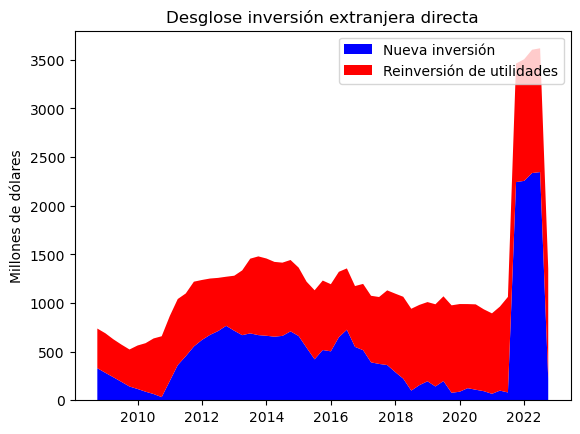

In [16]:
# Recurso opcional de referencia:
# https://www.educative.io/edpresso/how-to-create-a-stack-plot-using-matplotlib


# Reinversión de utilidades
fdi_profits_reinvestment_accumulated =  trends.get_accumulated_values(
    balance_payements_dataframe[FDI_PROFITS_REINVESTMENT], lot_size=4) #4 trimestres

# Nueva inversión 
fdi_new_investment_accumulated = trends.get_accumulated_values(
    (balance_payements_dataframe[FOREIGN_DIRECT_INVESTMENT]
     - balance_payements_dataframe[FDI_PROFITS_REINVESTMENT]),
      lot_size=4) #4 trimestres

plt.stackplot(balance_payements_dataframe.date[3:],
         fdi_new_investment_accumulated[3:],
         fdi_profits_reinvestment_accumulated[3:],
          colors=['blue', 'red'], labels=['Nueva inversión','Reinversión de utilidades'])
plt.title("Desglose inversión extranjera directa")
plt.ylabel("Millones de dólares")
plt.legend()
plt.show()

In [17]:
fdi_csv = "Inversion-Extranjera-Directa-Millones-Dolares-Acum-4-Trimestres.csv"
pd.DataFrame({"date": balance_payements_dataframe.date[3:],
              "quarter": balance_payements_dataframe.quarter[3:],
              "Nueva inversión": fdi_new_investment_accumulated[3:],
              "Reinversión de utilidades": fdi_profits_reinvestment_accumulated[3:]}
             ).to_csv(fdi_csv , index=False)

In [18]:
bucket_path = 'ufm-market-trends/guatemala/inversion-extranjera-directa/desglose'
csv_file = fdi_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Inversion-Extranjera-Directa-Millones-Dolares-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][  2.6 KiB/  2.6 KiB]                                                
Operation completed over 1 objects/2.6 KiB.                                      
Copying gs://ufm-market-trends/guatemala/inversion-extranjera-directa/desglose/Inversion-Extranjera-Directa-Millones-Dolares-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][  2.6 KiB/  2.6 KiB]                                                
Operation completed over 1 objects/2.6 KiB.                                      
date,quarter,Nueva inversión,Reinversión de utilidades
2008-10-01,2008Q4,329.9661,407.64499
2009-01-01,2009Q1,282.00001,406.59715
2009-04-01,2009Q2,236.78732,390.23996
2009-07-01,2009Q3,189.79096999999996,383.01513
2009-10-01,2009Q4,141.48158999999998,380.84253
2010-01-01,2010Q1,115.98060000000002,447.40599
2010-04-01,2010Q2,88.32831000000002,498.63174000000004
2010-07-01,2010Q3,64.30556

In [19]:
# total_fdi_investment_accumulated = trends.get_accumulated_values(
#     balance_payements_dataframe[FOREIGN_DIRECT_INVESTMENT],
#       lot_size=4) #4 trimestres


# plt.plot(balance_payements_dataframe.date[3:],
#         exports_accumulated[3:], label="Exportaciones")
# plt.plot(balance_payements_dataframe.date[3:],
#         remittances_accumulated[3:], label="Remesas")
# plt.plot(balance_payements_dataframe.date[3:],
#         total_fdi_investment_accumulated[3:], label="Inversión extranjera directa total")
# plt.legend()
# plt.show()